In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [17]:
files = glob.glob('../TSP/RHC/*.csv')
files.sort()
#Number of Trials
trials = 5
#File name beginining
nb = 15
#File name ending
ne = -10
#Output file
name = '../TSP/tsp.csv'
#Range
r = [5,10,50,100,150,200,250,300]

In [18]:
files

['../TSP/RHC/TSP_RHC_1_LOG.csv',
 '../TSP/RHC/TSP_RHC_2_LOG.csv',
 '../TSP/RHC/TSP_RHC_3_LOG.csv',
 '../TSP/RHC/TSP_RHC_4_LOG.csv',
 '../TSP/RHC/TSP_RHC_5_LOG.csv']

In [19]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [20]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat([dfs[x+i] for i in range(trials)])
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[r])

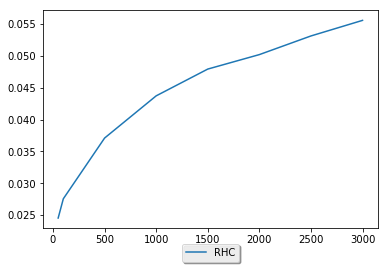

In [21]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

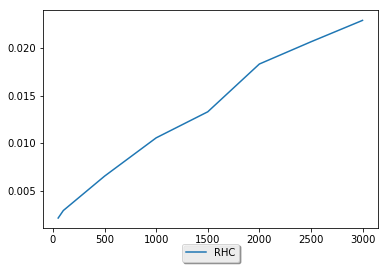

In [22]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [23]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 RHC


In [24]:
#Change this
df = df_concats[0]
df

,iterations,fitness,time,fevals
5,50,0.024550,0.002126,61
10,100,0.027573,0.002918,111
50,500,0.037097,0.006540,511
100,1000,0.043717,0.010571,1011
150,1500,0.047916,0.013313,1511
200,2000,0.050186,0.018342,2011
250,2500,0.053111,0.020681,2511
300,3000,0.055554,0.022937,3011


In [25]:
with open(name, 'w') as f:
    f.write('#RHC\n')
df.to_csv(name, sep=',', mode='a', header=True)